In [44]:
import pandas as pd
df = pd.read_csv('data/spam.csv', encoding="ISO-8859-1")

In [45]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
df.rename(columns = {'v1': 'class_label', 'v2': 'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [47]:
df['class_label'].value_counts()

class_label
ham     4825
spam     747
Name: count, dtype: int64

In [48]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")
labels = ['ham', 'spam']
counts = df['class_label'].value_counts().to_list()
ypos = np.arange(len(labels))
ypos

array([0, 1])

<BarContainer object of 2 artists>

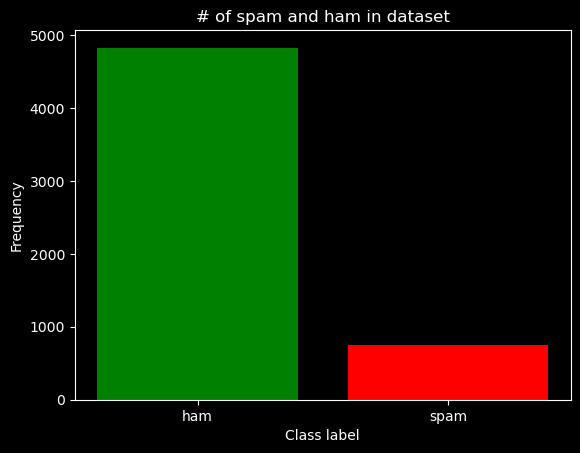

In [49]:
plt.xticks(ypos, labels)
plt.xlabel('Class label')
plt.ylabel('Frequency')
plt.title('# of spam and ham in dataset')
plt.bar(ypos, counts, color=['g', 'r'])

In [50]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0 if x == 'ham' else x)
df.head()

,class_label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
df_class_0 = df[df['class_label'] == 0]
df_class_1 = df[df['class_label'] == 1]

In [52]:
df_class_0.shape

(4825, 2)

In [53]:
df_class_1.shape

(747, 2)

In [54]:
df_class_1

,class_label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


### Robimy OVERSAMPLING (dokłądamy do mniejszej klasy powielone wartości)
moglibyśy robić UNDERSAMPLING (usuwamy z większej klasy)

albo w ogóle dołożyć SYNTETYCZNE dane ("sztuczne")

Random over-sampling:
class_label
0    4825
1    4825
Name: count, dtype: int64


<Axes: title={'center': '# od spam and ham in dataset'}, xlabel='class_label'>

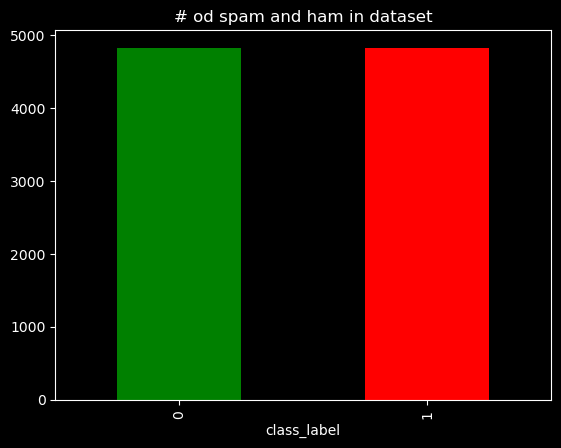

In [55]:
df_class_1_over = df_class_1.sample(df_class_0.shape[0], replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.class_label.value_counts())

df_over.class_label.value_counts().plot(kind='bar', title="# od spam and ham in dataset", color=['g', 'r'])

___
## Klasyfikacja niezbalansowanych zbiorów

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size=0.3, random_state=6)
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.to_list()

vectorizer = TfidfVectorizer(
    input='content',
    lowercase=True,
    stop_words='english'
)
features_train_transformed = vectorizer.fit_transform(data)
features_test_transformed = vectorizer.transform(x_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [16]:
print("Classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

Classifier accuracy 96.77%


In [17]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion matrix: ')
print(results)
print('Accuracy score: ', accuracy_score(actual, predicted))
print('Report: ')
print(classification_report(actual, predicted))
score_2 = f1_score(actual, predicted, average='binary')
print('F-Measure: %.3f' % score_2)

Confusion matrix: 
[[1432    0]
 [  54  186]]
Accuracy score:  0.9677033492822966
Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1432
           1       1.00      0.78      0.87       240

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

F-Measure: 0.873


<Axes: >

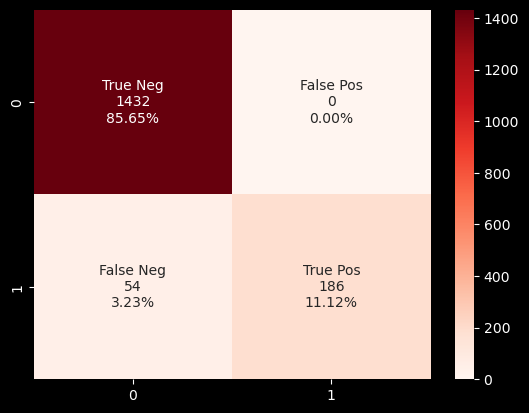

In [18]:
import seaborn as sns

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in results.flatten()]
group_precentages = ["{0:.2%}".format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_precentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt="", cmap='Reds')

## <font color='red'>Popełniony BŁĄD zwany <font color='blue'>Data Leaked</font></font>

### <font color='red'>Powielam dane w kategorii spam - przy podziale 70%/30% na dane treingowe i testowe, te same wiadomości mogą się znaleźć w obu zniorach</font>

<font color='red'>Powielam dane w kategorii spam - przy podziale 70%/30% na dane treingowe i testowe, te same wiadomości mogą się znaleźć w obu zniorach</font>

<font color='red'>Istnieje wiele sposobów na <font color='blue'>Data Leaked</font></font>
- <font color='red'>Przedwczesny Feature Engineering (fitowanie średnich, standaryzacja, itp)</font>
- <font color='red'>duplikaty (jak wyżej)</font>
- <font color='red'>wyciek danych w szeregach czasowych</font>

## Jak to naprawić:

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size=0.3, random_state=0)
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


In [20]:
df_class_0 = df[df['class_label'] == 0]
df_class_1 = df[df['class_label'] == 1]

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=0)
print('rows in test set: ' + str(test.shape))
print('rows in train set: ' + str(train.shape))

rows in test set: (1672, 2)
rows in train set: (3900, 2)


In [22]:
train_class_0 = train[train['class_label'] == 0]
train_class_1 = train[train['class_label'] == 1]
test_class_0 = test[test['class_label'] == 0]
test_class_1 = test[test['class_label'] == 1]

print('rows in train_class_0 set: ' + str(train_class_0.shape))
print('rows in train_class_1 set: ' + str(train_class_1.shape))
print('rows in test_class_0 set: ' + str(test_class_0.shape))
print('rows in test_class_1 set: ' + str(test_class_1.shape))

rows in train_class_0 set: (3391, 2)
rows in train_class_1 set: (509, 2)
rows in test_class_0 set: (1434, 2)
rows in test_class_1 set: (238, 2)


In [23]:
train_class_1_over = train_class_1.sample(train_class_0.shape[0], replace=True)
print('Random over-sampling:')
print('Rows in train class 1 set: ' + str(train_class_1_over.shape))

test_class_1_over = test_class_1.sample(test_class_0.shape[0], replace=True)
print('Random over-sampling:')
print('Rows in test class 1 set: ' + str(test_class_1_over.shape))

Random over-sampling:
Rows in train class 1 set: (3391, 2)
Random over-sampling:
Rows in test class 1 set: (1434, 2)


___
## Klasyfikacja zbalansowanych zbiorów

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.concat([train_class_0, train_class_1_over], axis=0)
data

,class_label,message
4380,0,Mathews or tait or edwards or anderson
3887,0,ok....take care.umma to you too...
4755,0,Don't make life too stressfull.. Always find t...
4747,0,The beauty of life is in next second.. which h...
1922,0,I'll be in sch fr 4-6... I dun haf da book in ...
...,...,...
249,1,Congratulations ur awarded 500 of CD vouchers ...
4983,1,goldviking (29/M) is inviting you to be his fr...
4733,1,Buy Space Invaders 4 a chance 2 win orig Arcad...
4989,1,Phony å£350 award - Todays Voda numbers ending...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

y_train = data['class_label']

vectorizer = TfidfVectorizer(
    input='content',
    lowercase=True,
    stop_words='english'
)
features_train_transformed = vectorizer.fit_transform(data['message'].tolist())

test = pd.concat([test_class_0, test_class_1_over], axis=0)
y_test = test['class_label']
features_test_transformed = vectorizer.transform(test['message'])

TypeError: list indices must be integers or slices, not str

In [26]:
df_vectorized = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names_out())

In [27]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [28]:
print("Classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

Classifier accuracy 96.86%


In [29]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion matrix: ')
print(results)
print('Accuracy score: ', accuracy_score(actual, predicted))
print('Report: ')
print(classification_report(actual, predicted))
score_2 = f1_score(actual, predicted, average='binary')
print('F-Measure: %.3f' % score_2)

Confusion matrix: 
[[1396   38]
 [  52 1382]]
Accuracy score:  0.9686192468619247
Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1434
           1       0.97      0.96      0.97      1434

    accuracy                           0.97      2868
   macro avg       0.97      0.97      0.97      2868
weighted avg       0.97      0.97      0.97      2868

F-Measure: 0.968


<Axes: >

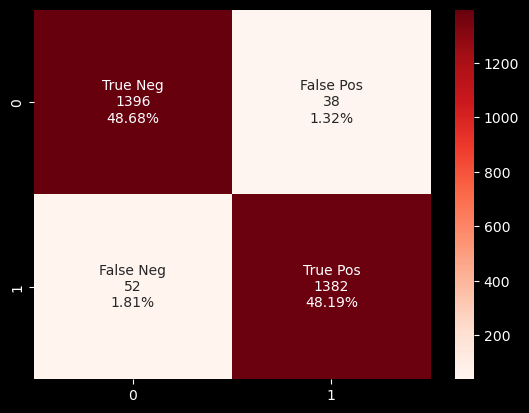

In [30]:
import seaborn as sns

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in results.flatten()]
group_precentages = ["{0:.2%}".format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_precentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt="", cmap='Reds')

## Inne klasyfikatory

In [31]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(features_train_transformed, y_train)

SVC(kernel='linear')

In [32]:
print("Classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

Classifier accuracy 96.62%


In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

labels = classifier.predict(features_test_transformed)
actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)

print('Confusion matrix: ')
print(results)
print('Accuracy score: ', accuracy_score(actual, predicted))
print('Report: ')
print(classification_report(actual, predicted))
score_2 = f1_score(actual, predicted, average='binary')
print('F-Measure: %.3f' % score_2)

Confusion matrix: 
[[1427    7]
 [  90 1344]]
Accuracy score:  0.9661785216178521
Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1434
           1       0.99      0.94      0.97      1434

    accuracy                           0.97      2868
   macro avg       0.97      0.97      0.97      2868
weighted avg       0.97      0.97      0.97      2868

F-Measure: 0.965


## PYT: ALE CZY NIE PRZETRENOWUJEMY MODELU?

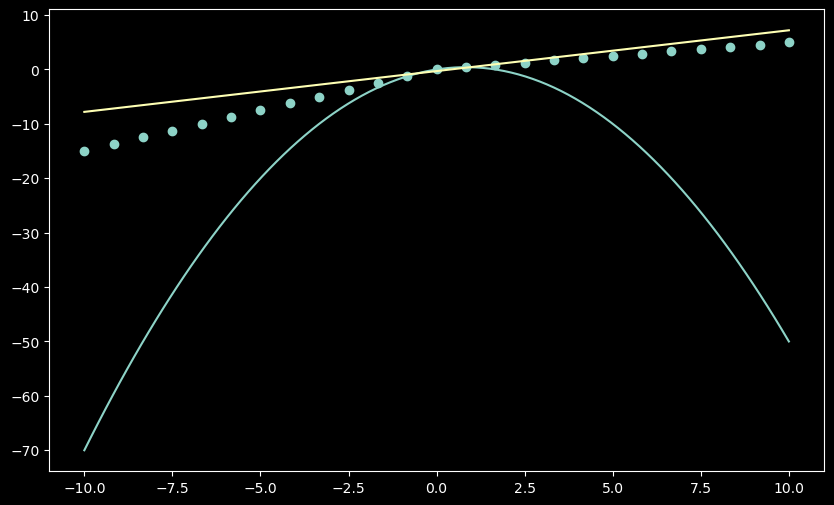

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
x = np.linspace(-10, 10, 25)
plt.scatter(x, x-0.5*np.abs(x))

x = np.linspace(-10, 10, 100)
plt.plot(x, x-0.6*x*x)
plt.plot(x, 0.75*x-.3)

## PYT: ALE CZY NIE PRZETRENOWUJEMY MODELU?
## ODP: TAK, bo dopasowywujemy estymator cały czas do 1 zbioru testowego

Należy jeszcze wybrać zbiór walidacyjny, na którym sprawdzimy dobór modeli po ich selekcji

___ 
## Walidacja krzyżowa

In [68]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_validate, y_train, y_validate = train_test_split(df_over['message'], df_over['class_label'], test_size=0.2, random_state=222)

print('rows in validation set: '+str(x_validate.shape))
print('rows in train set: '+str(x_train.shape))

data = df_over['message'].tolist()

vectorizer = TfidfVectorizer(
    input = data,
    lowercase=True,
    stop_words='english',
    min_df=2
)


rows in validation set: (1930,)
rows in train set: (7720,)


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.concat([train_class_0, train_class_1_over], axis=0)
data

,class_label,message
4380,0,Mathews or tait or edwards or anderson
3887,0,ok....take care.umma to you too...
4755,0,Don't make life too stressfull.. Always find t...
4747,0,The beauty of life is in next second.. which h...
1922,0,I'll be in sch fr 4-6... I dun haf da book in ...
...,...,...
249,1,Congratulations ur awarded 500 of CD vouchers ...
4983,1,goldviking (29/M) is inviting you to be his fr...
4733,1,Buy Space Invaders 4 a chance 2 win orig Arcad...
4989,1,Phony å£350 award - Todays Voda numbers ending...


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = x_train.tolist()

vectorizer = TfidfVectorizer(
    input = 'content',
    lowercase=True,
    stop_words='english'
)
features_train_transformed = vectorizer.fit_transform(data)
features_test_transformed = vectorizer.transform(x_validate)

In [71]:
vectorizer.fit(data)

TfidfVectorizer(stop_words='english')

In [72]:
x_validate = x_test
y_validate = y_test

In [73]:
features_test_transformed = vectorizer.transform(x_validate)
df_vectorized = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names_out())

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [76]:
print("Classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_validate) * 100))

Classifier accuracy 97.79%


In [77]:
features_train_transformed = vectorizer.transform(x_train)
features_validate_transformed = vectorizer.transform(x_validate)

train_vectorized = pd.DataFrame(features_train_transformed.toarray(), columns = vectorizer.get_feature_names_out())
print('vectorized trained set: ' + str(x_train.shape))

vectorized trained set: (7720,)


### Walidacja krzyżowa dla metody Wktorów Nośnych

In [79]:
classifier = SVC(kernel='linear')
scores = cross_val_score(classifier, features_train_transformed, y_train, cv=5, scoring='f1')
print(list(scores))
print()
print('f1: %0.4f (+/- %0.4f)' % (scores.mean(), scores.std() * 2))

[0.9980582524271845, 0.9948253557567918, 0.9980607627666451, 0.9967637540453075, 0.9954809554551324]

f1: 0.9966 (+/- 0.0026)


### Wynik końcowy dla metody Wektorów Nośnych

In [82]:
classifier.fit(features_train_transformed, y_train)
labels = classifier.predict(features_validate_transformed)
actual = y_validate.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print(results)
score = f1_score(actual, predicted)
print("F1: %f" %score)

[[1430    2]
 [   2  238]]
F1: 0.991667


<Axes: >

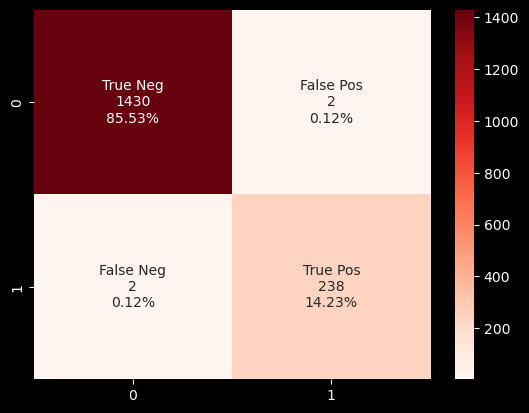

In [83]:
import seaborn as sns

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in results.flatten()]
group_precentages = ["{0:.2%}".format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_precentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt="", cmap='Reds')

### Walidacja krzyżowa dla metody Naiwnego Bayesa

In [85]:
classifier = MultinomialNB()
scores = cross_val_score(classifier, features_train_transformed, y_train, cv=5, scoring="f1")
print(list(scores))
print()
print('f1: %0.4f (+/- %0.4f)' % (scores.mean(), scores.std() * 2))

[0.9776357827476039, 0.9782051282051282, 0.982051282051282, 0.9807445442875481, 0.9776357827476039]

f1: 0.9793 (+/- 0.0036)


### Wynik końcowy dla metody Naiwnego Bayesa

In [87]:
classifier.fit(features_train_transformed, y_train)
labels = classifier.predict(features_validate_transformed)
actual = y_validate.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print(results)
score = f1_score(actual, predicted)
print("F1: %f" %score)

[[1396   36]
 [   1  239]]
F1: 0.928155


<Axes: >

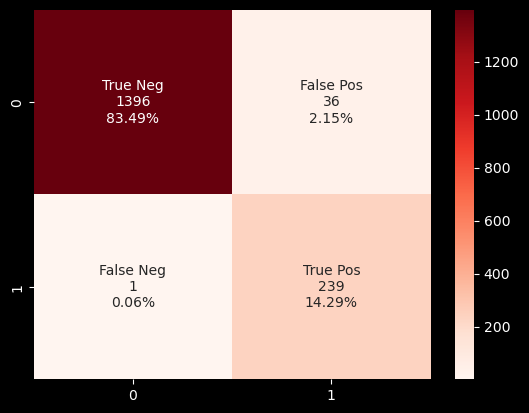

In [88]:
import seaborn as sns

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in results.flatten()]
group_precentages = ["{0:.2%}".format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_precentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt="", cmap='Reds')